# Yleisten kirjastojen aineistot Melindassa

Pilottikirjastojen (Piki, Anders) ja Vaskin vertailua.

Piirretään ensin Vennin diagrammi pilottien ja Vaskin aineistosta. Kaavio kuvaa eri kirjastoille yhteisiä ja erillisiä tietueita. Ensimmäisessä versio kattaa kaikki tietueet, jälkimmäisessä poikastietueita ei ole huomioitu eli mukana ovat vain osakohteettomat ja emotietueet.

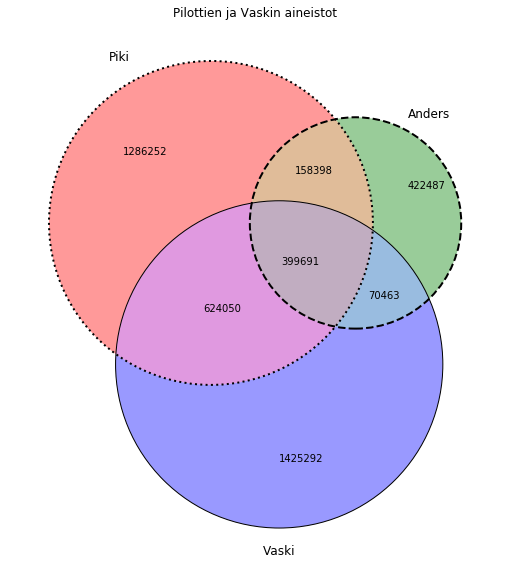

In [1]:
import numpy as np
import operator
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib_venn import venn3, venn3_circles

def readIds(idFile):
    with open(idFile, 'rt') as f:
        return {x.strip() for x in f}


# argumenttina lista tiedostonimistä, toinen lista otsikoista
def venn(data, labels, title, filename):
    subsets = list(map(readIds, data))
    plt.figure(figsize=(10,10))
    plt.title(title)
    venn3(subsets, labels)
    c = venn3_circles(subsets=subsets, linestyle='solid')
    c[0].set_ls('dotted')  # Line style
    c[1].set_ls('dashed')
    c[2].set_lw(1.0)       # Line width
    plt.savefig("./images/" + filename)
    plt.show()

    
venn(["./data/PIKI_ids.txt", "./data/ANDERS_ids.txt", "./data/VASKI_ids.txt"],
     ["Piki", "Anders", "Vaski"],
     "Pilottien ja Vaskin aineistot",
     "venn_pilotit_ja_vaski.png")

Sama ilman poikastietueita. Tässä mukana siis osakohteettomat ja emotietueet.

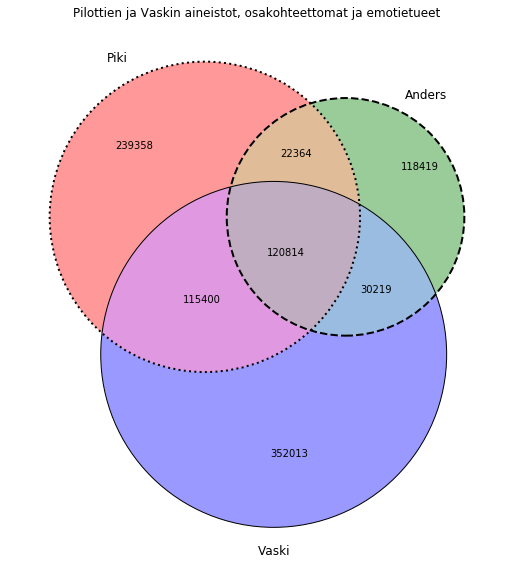

In [2]:
venn(["./data/PIKI_nonsub_ids.txt", "./data/ANDERS_nonsub_ids.txt", "./data/VASKI_nonsub_ids.txt"],
     ["Piki", "Anders", "Vaski"],
     "Pilottien ja Vaskin aineistot, osakohteettomat ja emotietueet",
     "venn_pilotit_ja_vaski_osakohteettomat.png")

Pilotit ja Vaski osana Melindaa.

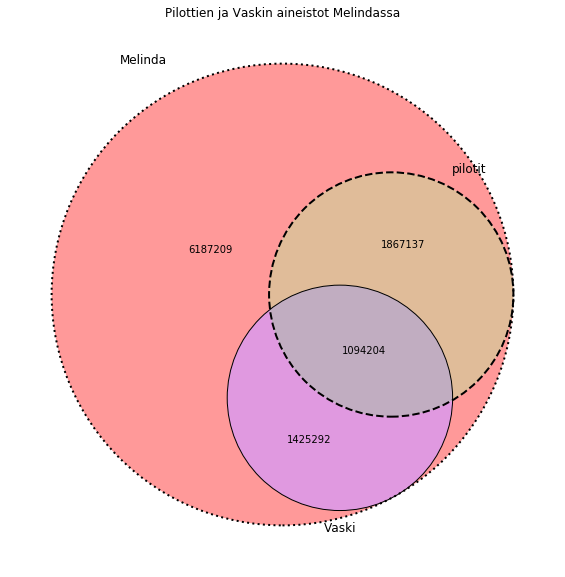

In [3]:
venn(["./data/MELINDA_ids.txt", "./data/PILOTIT_ids.txt", "./data/VASKI_ids.txt"],
     ["Melinda", "pilotit", "Vaski"],
     "Pilottien ja Vaskin aineistot Melindassa",
     "venn_pilotit_ja_vaski_melindassa.png")

Sama ilman poikastietueita, mukana osakohteettomat ja emot.

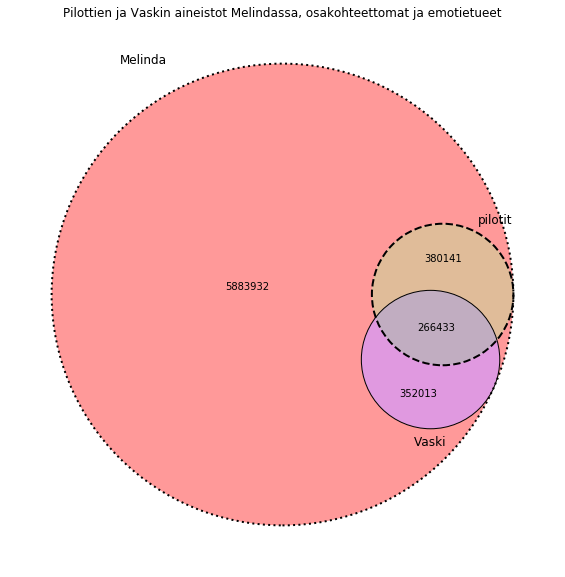

In [4]:
venn(["./data/MELINDA_nonsub_ids.txt", "./data/PILOTIT_nonsub_ids.txt", "./data/VASKI_nonsub_ids.txt"],
     ["Melinda", "pilotit", "Vaski"],
     "Pilottien ja Vaskin aineistot Melindassa, osakohteettomat ja emotietueet",
     "venn_pilotit_ja_vaski_melindassa_osakohteettomat.svg")

Pilotit ja Vaskin Melindaan yhdistyvä ja uutena tullut aineisto.

Tämä kuva tulee tarvittaessa piirtää uusiksi, sillä leikkausten pinta-alat vääristyvät pallojen ollessa täysin pyöreitä.

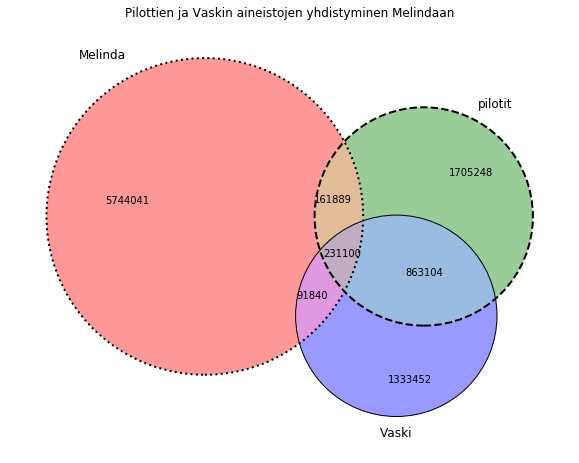

In [5]:
venn(["./data/MUUT_ids.txt", "./data/PILOTIT_ids.txt", "./data/VASKI_ids.txt"],
     ["Melinda", "pilotit", "Vaski"],
     "Pilottien ja Vaskin aineistojen yhdistyminen Melindaan",
     "venn_pilotit_ja_vaski_yhdistyminen.svg")

Edellinen ilman osakohteita, mukana osakohteettomat ja emotietueet.

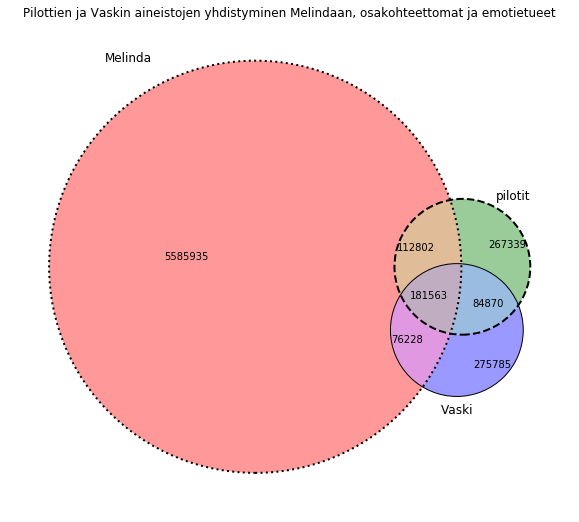

In [6]:
venn(["./data/MUUT_nonsub_ids.txt", "./data/PILOTIT_nonsub_ids.txt", "./data/VASKI_nonsub_ids.txt"],
     ["Melinda", "pilotit", "Vaski"],
     "Pilottien ja Vaskin aineistojen yhdistyminen Melindaan, osakohteettomat ja emotietueet",
     "venn_pilotit_ja_vaski_yhdistyminen_osakohteettomat.png")

Vrt. pinta-aloiltaan korjattu versio.
![title](images/melinda_aineistot.svg_final.png)

## Aineistojen julkaisuvuodet

Tutkitaan aineistojen 008-kenttään merkittyjä julkaisuvuosia. Tarkasteluun on otettu taas vain osakohteettomat ja emot.

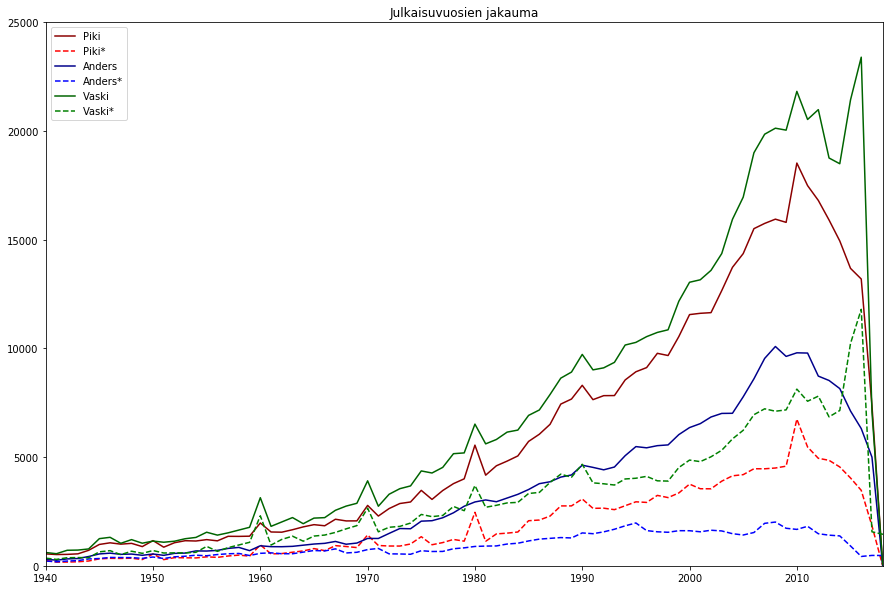

In [7]:
# Tässä argumentit tupleja, esim. db1 = (years, counts, name)
# ranges on muotoa (xmin, xmax, ymin, ymax)
def plotTimeSeries(db1, db2, db3, db4, db5, db6, title, ranges, legend="upper left"):
    plt.figure(figsize=(15,10))
    upperlimit = 0
    for x in zip(db1[1], db2[1], db3[1], db4[1], db5[1], db6[1]):
        maxCount = max(x)
        if upperlimit < maxCount:
            upperlimit = maxCount
    plt.axis(ranges)
    plt.plot(db1[0], db1[1], 'darkred', label=db1[2])
    plt.plot(db4[0], db4[1], '--', color='red', label=db4[2])
    plt.plot(db2[0], db2[1], 'darkblue', label=db2[2])
    plt.plot(db5[0], db5[1], '--', color='blue', label=db5[2])
    plt.plot(db3[0], db3[1], 'darkgreen', label=db3[2])
    plt.plot(db6[0], db6[1], '--', color='green', label=db6[2])
    plt.title(title)
    plt.legend(loc=legend)
    plt.savefig("./images/" + title.replace(" ", "_").lower() + ".png")
    plt.show()

    
def loadValues(filename, title):
    """
    Returns a tuple (values, counts, title)
    """
    data = {}
    with open(filename, 'rt') as f:
        for line in f:
            try:
                year = int(line.strip())
                if year in data:
                    data[year] += 1
                else:
                    data[year] = 1
            except:
                continue
    sorted_data = sorted(data.items(), key=operator.itemgetter(0))
    return ([x[0] for x in sorted_data], [x[1] for x in sorted_data], title)


piki = loadValues('./data/PIKI-VUODET.txt', 'Piki')
anders = loadValues('./data/ANDERS-VUODET.txt', 'Anders')
vaski = loadValues('./data/VASKI-VUODET.txt', 'Vaski')
piki_oo = loadValues('./data/PIKI_onlyowner_vuodet.txt', 'Piki*')
anders_oo = loadValues('./data/ANDERS_onlyowner_vuodet.txt', 'Anders*')
vaski_oo = loadValues('./data/VASKI_onlyowner_vuodet.txt', 'Vaski*')

plotTimeSeries(piki, anders, vaski, piki_oo, anders_oo, vaski_oo,
               'Julkaisuvuosien jakauma',
               (1940, 2018, 0, 25000))

Lasketaan kvantiilit.

In [8]:
def countQuantiles(files):
    """
    Kvantiilien laskeminen. Ottaa argumenttina listan tupleja muotoa (tiedosto, nimi), palauttaa datakehikon muotoa:
           0 %  25 %  50 %  75 %  100 %
    PIKI
    PIKI*
    ANDERS
    ANDERS*
    VASKI
    VASKI*
    """
    rawdata = {}
    for db in files:
        file, name = db
        rawdata[name] = []
        with open(file, 'rt') as f:
            for line in f:
                # Karsitaan mahdottomat julkaisuvuodet pois
                try:
                    year = int(line.strip())
                    if 0 < year < 2021:
                        rawdata[name].append(year)
                except:
                    continue
    percentiles = [['']]
    for x in files:
        _, name = x
        years = np.array(rawdata[name])
        currentRow = [name]
        for y in range(0, 125, 25):
            colName = "{0} %".format(y)
            if not colName in percentiles[0]:
                percentiles[0].append(colName)
            currentRow.append(np.percentile(years, q=y))
        percentiles.append(currentRow)
    data = np.array(percentiles)
    return pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])

quantiles = countQuantiles([("./data/PIKI-VUODET.txt", "Piki"),
                            ("./data/PIKI_onlyowner_vuodet.txt", "Piki*"),
                            ("./data/ANDERS-VUODET.txt", "Anders"),
                            ("./data/ANDERS_onlyowner_vuodet.txt", "Anders*"),
                            ("./data/VASKI-VUODET.txt", "Vaski"),
                            ("./data/VASKI_onlyowner_vuodet.txt", "Vaski*")])

assert(quantiles.shape) == (6, 5)
quantiles

,0 %,25 %,50 %,75 %,100 %
Piki,20.0,1986.0,2000.0,2009.0,2020.0
Piki*,994.0,1983.0,1998.0,2009.0,2018.0
Anders,20.0,1986.0,2000.0,2009.0,2019.0
Anders*,1005.0,1966.0,1990.0,2003.0,2017.0
Vaski,1.0,1986.0,2001.0,2010.0,2020.0
Vaski*,8.0,1980.0,1998.0,2009.0,2017.0


## Tietueiden pituus

Tietueiden pituuksien tutkiminen. Pituus tässä on kenttien määrä tietueessa. Nimiötä tai Alephin sisäisiä kenttiä (LOW, SID, STA yms.) ei ole huomioitu.

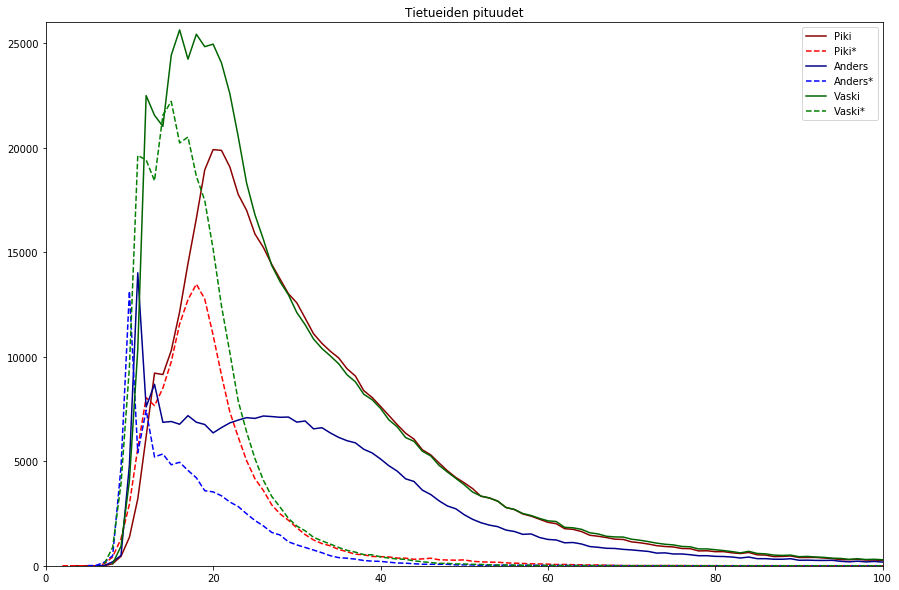

In [9]:
piki_l = loadValues('./data/PIKI_recordlengths.txt', 'Piki')
anders_l = loadValues('./data/ANDERS_recordlengths.txt', 'Anders')
vaski_l = loadValues('./data/VASKI_recordlengths.txt', 'Vaski')
piki_oo_l = loadValues('./data/PIKI_onlyowner_recordlengths.txt', 'Piki*')
anders_oo_l = loadValues('./data/ANDERS_onlyowner_recordlengths.txt', 'Anders*')
vaski_oo_l = loadValues('./data/VASKI_onlyowner_recordlengths.txt', 'Vaski*')

plotTimeSeries(piki_l, anders_l, vaski_l, piki_oo_l, anders_oo_l, vaski_oo_l,
               'Tietueiden pituudet',
               (0, 100, 0, 26000),
               'upper right')

Pituuksien kvantiilit.

In [10]:
lengthQuantiles = countQuantiles([("./data/PIKI_recordlengths.txt", "Piki"),
                                  ("./data/PIKI_onlyowner_recordlengths.txt", "Piki*"),
                                  ("./data/ANDERS_recordlengths.txt", "Anders"),
                                  ("./data/ANDERS_onlyowner_recordlengths.txt", "Anders*"),
                                  ("./data/VASKI_recordlengths.txt", "Vaski"),
                                  ("./data/VASKI_onlyowner_recordlengths.txt", "Vaski*")])

lengthQuantiles

,0 %,25 %,50 %,75 %,100 %
Piki,3.0,21.0,28.0,40.0,427.0
Piki*,2.0,15.0,18.0,23.0,426.0
Anders,6.0,19.0,29.0,41.0,329.0
Anders*,5.0,11.0,16.0,21.0,273.0
Vaski,8.0,17.0,24.0,37.0,579.0
Vaski*,7.0,13.0,17.0,20.0,578.0


## Sisällönkuvailu

Asiasanakenttien määrien tarkastelu.

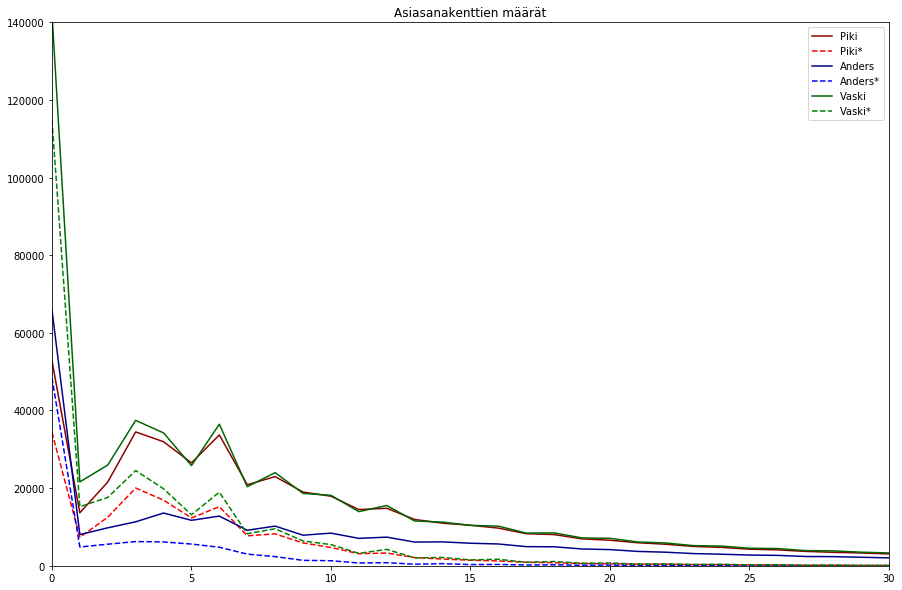

In [11]:
piki_shs = loadValues('./data/PIKI_SH_counts.txt', 'Piki')
anders_shs = loadValues('./data/ANDERS_SH_counts.txt', 'Anders')
vaski_shs = loadValues('./data/VASKI_SH_counts.txt', 'Vaski')
piki_oo_shs = loadValues('./data/PIKI_SH_onlyowner_counts.txt', 'Piki*')
anders_oo_shs = loadValues('./data/ANDERS_SH_onlyowner_counts.txt', 'Anders*')
vaski_oo_shs = loadValues('./data/VASKI_SH_onlyowner_counts.txt', 'Vaski*')

plotTimeSeries(piki_shs, anders_shs, vaski_shs, piki_oo_shs, anders_oo_shs, vaski_oo_shs,
               'Asiasanakenttien määrät',
               (0, 30, 0, 140000),
               'upper right')

In [12]:
shQuantiles = countQuantiles([('./data/PIKI_SH_counts.txt', 'Piki'),
                              ('./data/PIKI_SH_onlyowner_counts.txt', 'Piki*'),
                              ('./data/ANDERS_SH_counts.txt', 'Anders'),
                              ('./data/ANDERS_SH_onlyowner_counts.txt', 'Anders*'),
                              ('./data/VASKI_SH_counts.txt', 'Vaski'),
                              ('./data/VASKI_SH_onlyowner_counts.txt', 'Vaski*')])

shQuantiles

,0 %,25 %,50 %,75 %,100 %
Piki,1.0,5.0,9.0,19.0,366.0
Piki*,1.0,3.0,5.0,8.0,183.0
Anders,1.0,6.0,12.0,23.0,315.0
Anders*,1.0,3.0,5.0,7.0,106.0
Vaski,1.0,4.0,9.0,19.0,366.0
Vaski*,1.0,3.0,5.0,8.0,264.0


## Aineistolajit

Eri aineistolajien osuudet kokoelmissa ja yhdistymättömässä aineistossa.

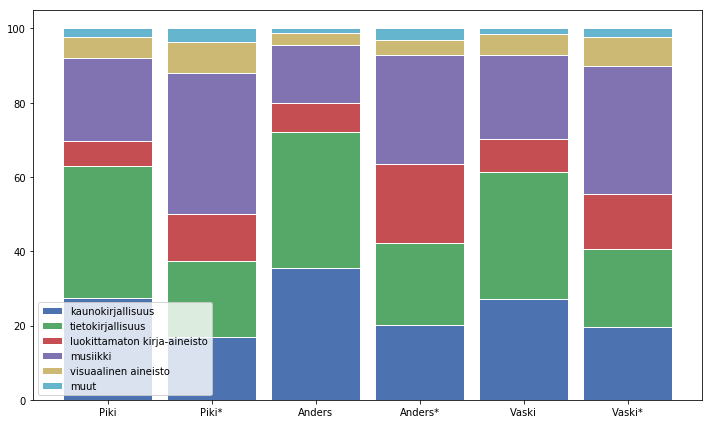

In [40]:
# BK, MU, VM ja MUUT

# Indeksit: PIKI, PIKI (yhdistymätön), ANDERS, ANDERS (yhdistymätön), VASKI, VASKI (yhdistymätön)

r = [0, 1, 2, 3, 4, 5]
raw_data = {'BKkauno': [135813, 27739, 103355, 19149, 167059, 53922],
            'BKtieto': [177183, 33790, 107128, 20799, 211578, 58240],
            'BKmuut': [33418, 20399, 22839, 20126, 54939, 40792],
            'MU': [111546, 62679, 45548, 27770, 140145, 94708],
            'VM': [27709, 13485, 9041, 3878, 34780, 21359],
            'MUUT': [11469, 5999, 3670, 2840, 9045, 6667]}
df = pd.DataFrame(raw_data)

def aineistolajienOsuudet(df):
    totals = [i+j+k+l+m+n for i,j,k,l,m,n in zip(df['BKkauno'], df['BKtieto'], df['BKmuut'], df['MU'], df['VM'], df['MUUT'])]
    BKKaunoBars = [i / j * 100 for i,j in zip(df['BKkauno'], totals)]
    BKTietoBars = [i / j * 100 for i,j in zip(df['BKtieto'], totals)]
    BKMuutBars = [i / j * 100 for i,j in zip(df['BKmuut'], totals)]
    MUBars = [i / j * 100 for i,j in zip(df['MU'], totals)]
    VMBars = [i / j * 100 for i,j in zip(df['VM'], totals)]
    MUUTBars = [i / j * 100 for i,j in zip(df['MUUT'], totals)]

    barWidth = 0.85
    names = ('Piki', 'Piki*', 'Anders', 'Anders*', 'Vaski', 'Vaski*')
    #plt.figure(figsize=(10,10))
    plt.figure(figsize=(10,6))
    plt.style.use('seaborn-deep')

    plt.bar(r, BKKaunoBars, edgecolor='white', width=barWidth, label='kaunokirjallisuus')
    plt.bar(r, BKTietoBars, bottom=BKKaunoBars, edgecolor='white', width=barWidth, label='tietokirjallisuus')
    plt.bar(r, BKMuutBars, bottom=[i+j for i,j in zip(BKKaunoBars, BKTietoBars)], edgecolor='white', width=barWidth, label='luokittamaton kirja-aineisto')
    plt.bar(r, MUBars, bottom=[i+j+k for i,j,k in zip(BKKaunoBars, BKTietoBars, BKMuutBars)], edgecolor='white', width=barWidth, label='musiikki')
    plt.bar(r, VMBars, bottom=[i+j+k+l for i,j,k,l in zip(BKKaunoBars, BKTietoBars, BKMuutBars, MUBars)], edgecolor='white', width=barWidth, label='visuaalinen aineisto')
    plt.bar(r, MUUTBars, bottom=[i+j+k+l+m for i,j,k,l,m in zip(BKKaunoBars, BKTietoBars, BKMuutBars, MUBars, VMBars)],  edgecolor='white', width=barWidth, label='muut')

    plt.xticks(r, names)
    plt.tight_layout()
    #plt.ylabel("osuus")
    plt.legend(loc='best')
    #plt.title("Eri aineistolajien osuus kokoelmista (%)")
    plt.savefig("./images/aineistolajit_osuudet.png")
    plt.show()

    
aineistolajienOsuudet(df)

## Aineistojen kielet

In [14]:
df_kieli = pd.read_csv("./data/kielikoodit.csv", names=['koodi', 'kieli_fin', 'kieli_eng', 'huomautus'], skiprows=1)

def openLanguageCode(code):
    return df_kieli[df_kieli['koodi'] == code]['kieli_fin'].values[0]


def readLanguages(files):
    """
    Luetaan kielikoodeja, palautetaan datakehikko muotoa:
            suomi  ruotsi   englanti   thai   esperanto
    PIKI   124124     123        543   1241      124209
    PIKI*   42319   42144        124   1249       39439
    """
    data = {}
    allCodes = set()
    index = []
    for file, name in files:
        index.append(name)
        data[name] = {}
        with open(file, 'rt') as f:
            for code in f:
                code = code.strip().lower()
                if code not in allCodes:
                    allCodes.add(code)
                if code in data[name]:
                    data[name][code] += 1
                else:
                    data[name][code] = 1
    allCodes = list(allCodes)
    allCodes.sort()
    # The format will be:
    # {"suomi": [123, 214, 25, 125, 125, 5], "ruotsi": [214, 124, 5, 532, 532, 1]}
    counts = {'tunnistamaton': np.zeros(len(index))}
    for code in allCodes:
        lang = 'tunnistamaton'
        langCounts = []
        try:
            lang = openLanguageCode(code)
        except:
            pass
        for db in data:
            if code in data[db]:
                langCounts.append(data[db][code])
            else:
                langCounts.append(0)
        if lang == 'tunnistamaton' or code == 'non': # Non = muinaisnorja, mutta ilmeisesti käytetty 
                                                     # usein merkityksessä "ei kieltä"
            counts['tunnistamaton'] = np.add(counts['tunnistamaton'], langCounts)
        else:
            counts[lang] = np.array(langCounts)
        
    return pd.DataFrame(counts, index=index)

languages = readLanguages([("./data/PIKI-KIELET.txt", "Piki"),
                         ("./data/PIKI_onlyowner-KIELET.txt", "Piki*"),
                         ("./data/ANDERS-KIELET.txt", "Anders"),
                         ("./data/ANDERS_onlyowner-KIELET.txt", "Anders*"),
                         ("./data/VASKI-KIELET.txt", "Vaski"),
                         ("./data/VASKI_onlyowner-KIELET.txt", "Vaski*")])

In [15]:
languages

,Etelä-Amerikan intiaanikielet,Keski-Amerikan intiaanikielet,Pohjois-Amerikan intiaanikielet,afrikaans,afroaasialaiset kielet,albania,algonkin-kielet,amhara,arabia,aramea,...,vatja,venda,venäjä,vietnam,viittomakielet,viro,wolof,xhosa,zulu,zuni
Piki,2,1,28,2,3,233,1,26,899,1,...,1,0,5667,225,3,1642,12,1,4,3
Piki*,2,0,15,1,2,152,1,20,612,0,...,0,0,3808,186,0,720,2,1,1,0
Anders,0,0,10,3,6,3,0,0,66,1,...,0,1,1036,5,4,327,3,0,2,1
Anders*,0,0,3,2,6,3,0,0,37,0,...,0,1,560,3,0,157,1,0,2,0
Vaski,1,2,11,5,6,883,2,9,1085,2,...,0,0,7470,311,6,2660,12,0,5,2
Vaski*,1,1,2,4,5,796,2,4,801,1,...,0,0,5776,269,0,1706,3,0,2,0


In [16]:
languages.describe()

,Etelä-Amerikan intiaanikielet,Keski-Amerikan intiaanikielet,Pohjois-Amerikan intiaanikielet,afrikaans,afroaasialaiset kielet,albania,algonkin-kielet,amhara,arabia,aramea,...,vatja,venda,venäjä,vietnam,viittomakielet,viro,wolof,xhosa,zulu,zuni
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.000000,0.666667,11.500000,2.833333,4.666667,345.000000,1.000000,9.833333,583.333333,0.833333,...,0.166667,0.333333,4052.833333,166.50000,2.166667,1202.000000,5.500000,0.333333,2.666667,1.000000
std,0.894427,0.816497,9.481561,1.471960,1.751190,394.097957,0.894427,10.888832,439.460882,0.752773,...,0.408248,0.516398,2778.955805,132.66763,2.562551,965.748829,5.089204,0.516398,1.505545,1.264911
min,0.000000,0.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,37.000000,0.000000,...,0.000000,0.000000,560.000000,3.00000,0.000000,157.000000,1.000000,0.000000,1.000000,0.000000
25%,0.250000,0.000000,4.750000,2.000000,3.500000,40.250000,0.250000,1.000000,202.500000,0.250000,...,0.000000,0.000000,1729.000000,50.25000,0.000000,425.250000,2.250000,0.000000,2.000000,0.000000
50%,1.000000,0.500000,10.500000,2.500000,5.500000,192.500000,1.000000,6.500000,706.500000,1.000000,...,0.000000,0.000000,4737.500000,205.50000,1.500000,1181.000000,3.000000,0.000000,2.000000,0.500000
75%,1.750000,1.000000,14.000000,3.750000,6.000000,655.250000,1.750000,17.250000,874.500000,1.000000,...,0.000000,0.750000,5748.750000,258.00000,3.750000,1690.000000,9.750000,0.750000,3.500000,1.750000
max,2.000000,2.000000,28.000000,5.000000,6.000000,883.000000,2.000000,26.000000,1085.000000,2.000000,...,1.000000,1.000000,7470.000000,311.00000,6.000000,2660.000000,12.000000,1.000000,5.000000,3.000000


Aineistojen yleisimmät kielet.

In [17]:
for db in languages.index.values:
    print(db.upper())
    print(languages.loc[db].sort_values(ascending=False)[:20])
    print("=" * 50)

PIKI
suomi                                    290991.0
englanti                                 111152.0
ei kielellistä sisältöä, soveltumaton     26255.0
ruotsi                                    18821.0
saksa                                      9093.0
ei koodattu                                5823.0
venäjä                                     5667.0
ranska                                     4415.0
espanja                                    2881.0
määrittelemätön                            2601.0
italia                                     2526.0
tunnistamaton                              2360.0
useita kieliä                              2250.0
viro                                       1642.0
latina                                     1228.0
arabia                                      899.0
farsi, persia                               871.0
kiina                                       819.0
puola                                       798.0
portugali                                   6

Lisätään kielitaulukkoon sarakkeet kunkin kielen osuuksille kannoissa.

In [18]:
from pandas import Series

def addPercentages(df):
    for lang in languages:
        newColTitle = "{0} (%)".format(lang)
        newColumn = []
        for db in df.index.values:
            newColumn.append(df[lang][db] / df.loc[db].sum() * 100)
        df[newColTitle] = Series(np.array(newColumn), index=df.index)
    return df.sort_index(axis=1)

languages2 = addPercentages(languages)
assert languages2.shape == (6, 386)
languages2

,Etelä-Amerikan intiaanikielet,Etelä-Amerikan intiaanikielet (%),Keski-Amerikan intiaanikielet,Keski-Amerikan intiaanikielet (%),Pohjois-Amerikan intiaanikielet,Pohjois-Amerikan intiaanikielet (%),afrikaans,afrikaans (%),afroaasialaiset kielet,afroaasialaiset kielet (%),...,viro,viro (%),wolof,wolof (%),xhosa,xhosa (%),zulu,zulu (%),zuni,zuni (%)
Piki,2,0.000402,1,0.000201,28,0.005623,2,0.000402,3,0.000602,...,1642,0.329697,12,0.002409,1,0.000201,4,0.000803,3,0.000602
Piki*,2,0.001219,0,0.000000,15,0.009141,1,0.000609,2,0.001219,...,720,0.438512,2,0.001218,1,0.000609,1,0.000609,0,0.000000
Anders,0,0.000000,0,0.000000,10,0.003427,3,0.001028,6,0.002056,...,327,0.112020,3,0.001028,0,0.000000,2,0.000685,1,0.000343
Anders*,0,0.000000,0,0.000000,3,0.003172,2,0.002115,6,0.006345,...,157,0.165845,1,0.001056,0,0.000000,2,0.002113,0,0.000000
Vaski,1,0.000162,2,0.000323,11,0.001779,5,0.000808,6,0.000970,...,2660,0.430039,12,0.001940,0,0.000000,5,0.000808,2,0.000323
Vaski*,1,0.000363,1,0.000363,2,0.000725,4,0.001451,5,0.001813,...,1706,0.618471,3,0.001088,0,0.000000,2,0.000725,0,0.000000


In [19]:
languages2.shape

(6, 386)

In [20]:
percentages = languages2.filter(regex="%")

In [21]:
percentages

,Etelä-Amerikan intiaanikielet (%),Keski-Amerikan intiaanikielet (%),Pohjois-Amerikan intiaanikielet (%),afrikaans (%),afroaasialaiset kielet (%),albania (%),algonkin-kielet (%),amhara (%),arabia (%),aramea (%),...,vatja (%),venda (%),venäjä (%),vietnam (%),viittomakielet (%),viro (%),wolof (%),xhosa (%),zulu (%),zuni (%)
Piki,0.000402,0.000201,0.005623,0.000402,0.000602,0.046793,0.000201,0.005222,0.180546,0.000201,...,0.000201,0.000000,1.137878,0.045178,0.000602,0.329697,0.002409,0.000201,0.000803,0.000602
Piki*,0.001219,0.000000,0.009141,0.000609,0.001219,0.092631,0.000609,0.012188,0.372961,0.000000,...,0.000000,0.000000,2.319277,0.113282,0.000000,0.438512,0.001218,0.000609,0.000609,0.000000
Anders,0.000000,0.000000,0.003427,0.001028,0.002056,0.001028,0.000000,0.000000,0.022617,0.000343,...,0.000000,0.000343,0.354902,0.001713,0.001370,0.112020,0.001028,0.000000,0.000685,0.000343
Anders*,0.000000,0.000000,0.003172,0.002115,0.006345,0.003172,0.000000,0.000000,0.039126,0.000000,...,0.000000,0.001056,0.591552,0.003169,0.000000,0.165845,0.001056,0.000000,0.002113,0.000000
Vaski,0.000162,0.000323,0.001779,0.000808,0.000970,0.142777,0.000323,0.001455,0.175439,0.000323,...,0.000000,0.000000,1.207668,0.050279,0.000970,0.430039,0.001940,0.000000,0.000808,0.000323
Vaski*,0.000363,0.000363,0.000725,0.001451,0.001813,0.288676,0.000725,0.001451,0.290489,0.000363,...,0.000000,0.000000,2.093974,0.097520,0.000000,0.618471,0.001088,0.000000,0.000725,0.000000


Aineistojen yleisimmät kielet, osuuksina.

In [22]:
for db in percentages.index.values:
    print(db.upper())
    print(percentages.loc[db].sort_values(ascending=False)[:20])
    assert 99 < percentages.loc[db].sum() < 101
    print("=" * 50)

PIKI
suomi (%)                                    58.435119
englanti (%)                                 22.322336
ei kielellistä sisältöä, soveltumaton (%)     5.272784
ruotsi (%)                                    3.779567
saksa (%)                                     1.826010
ei koodattu (%)                               1.169419
venäjä (%)                                    1.137878
ranska (%)                                    0.886606
espanja (%)                                   0.578557
määrittelemätön (%)                           0.522326
italia (%)                                    0.507266
tunnistamaton (%)                             0.473866
useita kieliä (%)                             0.451778
viro (%)                                      0.329697
latina (%)                                    0.246604
arabia (%)                                    0.180546
farsi, persia (%)                             0.174912
kiina (%)                                     0.164470
puola

In [29]:
# languages_filtered sisältää vain yksittäiset kielet
languages_filtered = languages.drop(['ei koodattu', 'ei kielellistä sisältöä, soveltumaton',
                                     'määrittelemätön', 'tunnistamaton', 'useita kieliä'], axis=1)

Kaavio osuuksista.

In [23]:
def plotLangPercentages(df):
    plt.figure(figsize=(15,10))
    topLangs = df.loc['Piki'].sort_values(ascending=False)[:5].index
    data = []
    dbs = languages2.index
    ind = np.arange(len(topLangs))
    width = 0.15
    for db in dbs:
        series = []
        for lang in topLangs:
            series.append(df[lang][db])
        data.append(series)
    for i, db in enumerate(data):
        plt.bar(ind + (i+1) * width, data[i], width, label=dbs[i])
    plt.xticks(ind + width * 3, topLangs)
    plt.ylabel('Osuus kokoelmasta (%)')
    plt.title('Yleisimmät kielet kokoelmissa')
    plt.legend(loc='best')
    plt.savefig("./images/languagePercentagesByLanguage.png")
    plt.show()

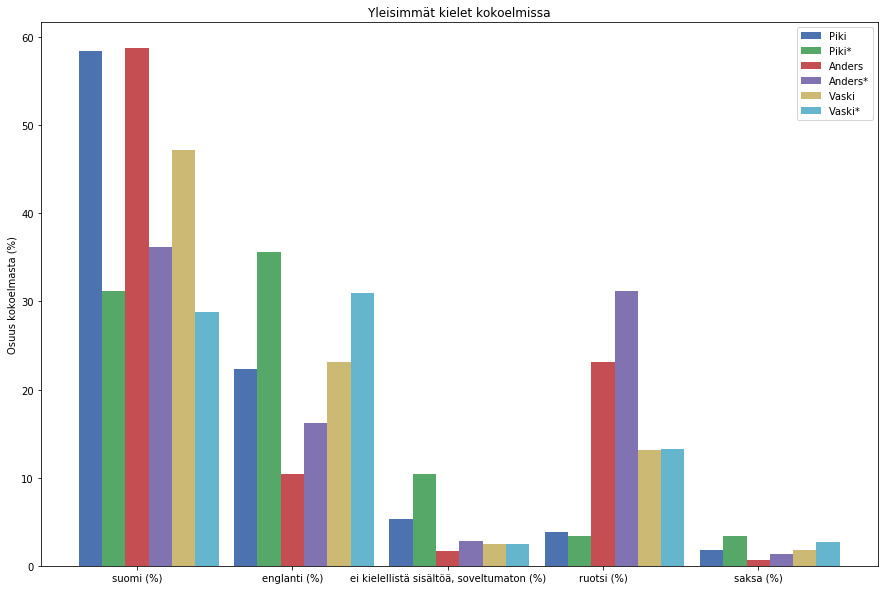

In [24]:
plotLangPercentages(percentages)

Edellisestä kaaviosta tulikin vaikeasti luettava. Kokeillaan muotoilla sama informaatio uudelleen.

In [43]:
def plotLangPercentages2(df):
    plt.figure(figsize=(13,5))
    topLangs = df.loc['Piki'].sort_values(ascending=False)[:5].index
    data = []
    dbs = languages2.index
    ind = np.arange(len(dbs))
    width = 0.15
    
    for lang in topLangs:
        series = []
        for db in dbs:
            series.append(df[lang][db])
        data.append(series)

    for i, db in enumerate(data):
        plt.bar(ind + (i+1) * width, data[i], width, label=topLangs[i])
    plt.xticks(ind + width * 3, dbs)
    plt.tight_layout()
    plt.ylabel('Osuus kokoelmasta (%)')
    #plt.title('Yleisimmät kielet kokoelmissa')
    plt.legend(loc='best')
    plt.savefig("./images/languagePercentagesByDb.png")
    plt.show()

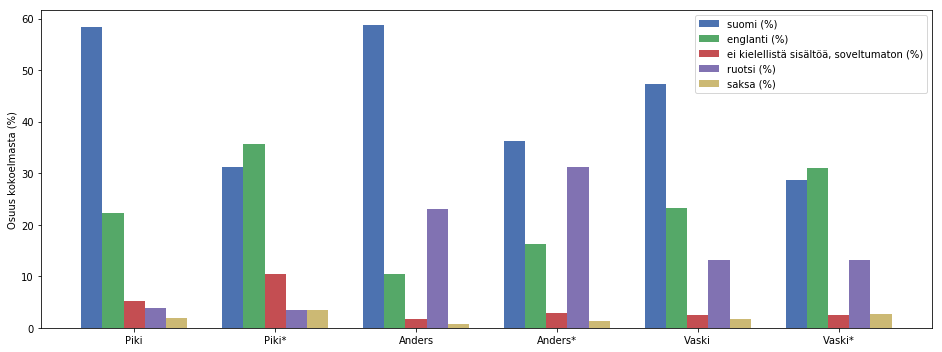

In [44]:
plotLangPercentages2(percentages)